#### MAESTRÍA EN ECONOMÍA APLICADA - UBA 2025
#### TALLER DE PROGRAMACIÓN
#### GRUPO 2 - TP1

In [23]:
# Librerías a utilizar
# !pip install openpyxl - utilizar en caso no te cargue el archivo de excel
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt

In [182]:
# Carga de datos de individuos de la EPH 1T2005-1T2025
T105_original = pd.read_stata("C:\\Users\\Usuario\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T105.dta",convert_categoricals=False)
T125_original = pd.read_excel("C:\\Users\\Usuario\\Documents\\GitHub\\Big-Data-UBA--Grupo-2\\base de datos\\usu_individual_T125.xlsx")

#### PARTE 1.a: Selección de región y fusión de bases

In [7]:
T105_original.columns

Index(['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)

In [ ]:
# Seleccion de variables de interes
select_var_T105 = ["CODUSU", "nro_hogar", "ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "ipcf",
                   "cat_ocup", "pp03c", "pp03i", "pp10a", "p21", "tot_p12", "t_vi"]
select_var_T125 = ["CODUSU", "NRO_HOGAR", "CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF",
                   "CAT_OCUP", "PP03C", "PP03I", "PP10A", "P21", "TOT_P12", "T_VI"]

# Actualizamos nuestro dataframe con las variables seleccionadas y la región seleccionada Noroeste = NOA = 40
T105 = T105_original[T105_original['region'] == 40][select_var_T105]
T125 = T125_original[T125_original['REGION'] == 40][select_var_T125]

# Homogeneizamos los nombres de las columnas para poder fusionarlas más adelante
column_mapping = dict(zip(select_var_T125, select_var_T105)) # diccionario
T125 = T125.rename(columns=column_mapping) # renombramos

In [10]:
# Antes de proceder con la unión de ambas bases, verificamos que ambas tengan el mismo tipo de dato.
T105.info()
T125.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9348 entries, 9484 to 18831
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODUSU     9348 non-null   object 
 1   nro_hogar  9348 non-null   float64
 2   ch04       9348 non-null   float64
 3   ch06       9348 non-null   float64
 4   ch07       9348 non-null   float64
 5   ch08       9348 non-null   float64
 6   nivel_ed   9348 non-null   float64
 7   estado     9348 non-null   float64
 8   cat_inac   9348 non-null   float64
 9   ipcf       9348 non-null   float64
 10  cat_ocup   9348 non-null   float64
 11  pp03c      9348 non-null   float64
 12  pp03i      9348 non-null   float64
 13  pp10a      9348 non-null   float64
 14  p21        9348 non-null   float64
 15  tot_p12    9348 non-null   float64
 16  t_vi       9348 non-null   float64
dtypes: float64(16), object(1)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 31 to 45397
Data colum

In [18]:
# Ajustamos el Dtype para ambas bases
categóricas = ["ch04","ch06","ch07","ch08","nivel_ed","estado","cat_inac", "cat_ocup"]
T105[categóricas] = T105[categóricas].astype('int64')
T125["ch08"] = T125["ch08"].astype('int64')

# Creamos columna para identificar los df
T105['df'] = 'T105'
T125['df'] = 'T125'

# Fusionamos los archivos
eph_105_125 = pd.concat([T105, T125], ignore_index=True)
eph_105_125

,CODUSU,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,cat_ocup,pp03c,pp03i,pp10a,p21,tot_p12,t_vi,df
0,125666,1.0,1,36,1,4,3,1,0,140.0,3,1.0,1.0,0.0,300.0,0.0,0.0,T105
1,125666,1.0,2,35,1,4,2,3,4,140.0,0,0.0,0.0,0.0,0.0,0.0,0.0,T105
2,125666,1.0,2,15,5,4,3,3,3,140.0,0,0.0,0.0,0.0,0.0,0.0,300.0,T105
3,125666,1.0,1,12,5,4,3,3,3,140.0,0,0.0,0.0,0.0,0.0,0.0,0.0,T105
4,125666,1.0,1,10,5,4,1,3,3,140.0,0,0.0,0.0,0.0,0.0,0.0,0.0,T105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19085,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,2,90,4,1,4,3,1,1250000.0,0,NaN,NaN,NaN,0.0,0.0,1500000.0,T125
19086,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,2,60,5,1,6,1,0,1250000.0,3,0.0,2.0,NaN,1500000.0,0.0,0.0,T125
19087,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,2,22,5,1,5,3,3,1250000.0,0,NaN,NaN,NaN,0.0,0.0,0.0,T125
19088,TQRMNOPPVHKOKSCDEHIBB00860370,1.0,1,25,1,4,2,1,0,537500.0,3,1.0,2.0,NaN,400000.0,0.0,0.0,T125


#### PARTE 1.b: Revisión de formato y heatmap
##### La revisión de formato se realizo en el apartado 1.a debido a que fue un proceso necesario antes de realizar la fusión de las bases de datos

In [19]:
# Procedemos a revisar las variables que tenemos, exceptuando las cariables de identificación
eph_105_125.drop("nro_hogar", axis=1).describe()

,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,cat_ocup,pp03c,pp03i,pp10a,p21,tot_p12,t_vi
count,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,19090.000000,1.909000e+04,19090.000000,13701.000000,13701.000000,9571.000000,1.909000e+04,1.909000e+04,1.909000e+04
mean,1.518491,32.657098,3.728392,2.731011,3.632635,2.301100,1.895862,1.878937e+05,1.190257,0.565871,1.029487,0.207606,1.183426e+05,9.127822e+03,5.466182e+04
std,0.499671,21.544972,1.583989,2.411227,1.858963,1.157584,1.996001,3.135108e+05,1.404829,0.589433,0.958865,0.853200,3.122836e+05,7.646590e+04,1.905967e+05
min,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-9.000000e+00,-9.000000e+00,-9.000000e+00
25%,1.000000,15.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.453125e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000,29.000000,5.000000,2.000000,4.000000,3.000000,1.000000,6.362500e+02,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,48.000000,5.000000,4.000000,5.000000,3.000000,3.000000,3.000000e+05,3.000000,1.000000,2.000000,0.000000,6.000000e+02,0.000000e+00,0.000000e+00
max,2.000000,103.000000,5.000000,23.000000,7.000000,4.000000,7.000000,6.150000e+06,4.000000,2.000000,9.000000,5.000000,7.000000e+06,2.700000e+06,4.500000e+06


In [ ]:
# Revisamos los valores faltantes
eph_105_125.isna().sum()

CODUSU          0
nro_hogar       0
ch04            0
ch06            0
ch07            0
ch08            0
nivel_ed        0
estado          0
cat_inac        0
ipcf            0
cat_ocup        0
pp03c        5389
pp03i        5389
pp10a        9519
p21             0
tot_p12         0
t_vi            0
df              0
dtype: int64

#### PARTE 1.c: Corrección de datos

In [31]:
eph_105_125["cat_ocup"].value_counts()

cat_ocup
0    10805
3     6090
2     1786
1      252
4      157
Name: count, dtype: int64

In [34]:
# Revisamos el cuestionario de la eph y detectamos que:
# Valores en 0 para cat_inac y estado son valores Nan por lo cual debemos corregir
# Valores 9 en nivel_ed y ch08 son en realidad NaN por lo cual debemos corregir
# Se detectó valores negativos en ch06 que significa "menores de 1 año" por lo cual debemos cambiarlo por 0
eph_105_125['cat_inac'] = eph_105_125['cat_inac'].replace(0, np.nan)
eph_105_125['cat_ocup'] = eph_105_125['cat_ocup'].replace(0, np.nan)
eph_105_125['estado'] = eph_105_125['estado'].replace(0, np.nan)
eph_105_125['nivel_ed'] = eph_105_125['nivel_ed'].replace(9, np.nan)
eph_105_125['ch08'] = eph_105_125['ch08'].replace(9, np.nan)
eph_105_125['ch06'] = eph_105_125['ch06'].replace(-1, 0)

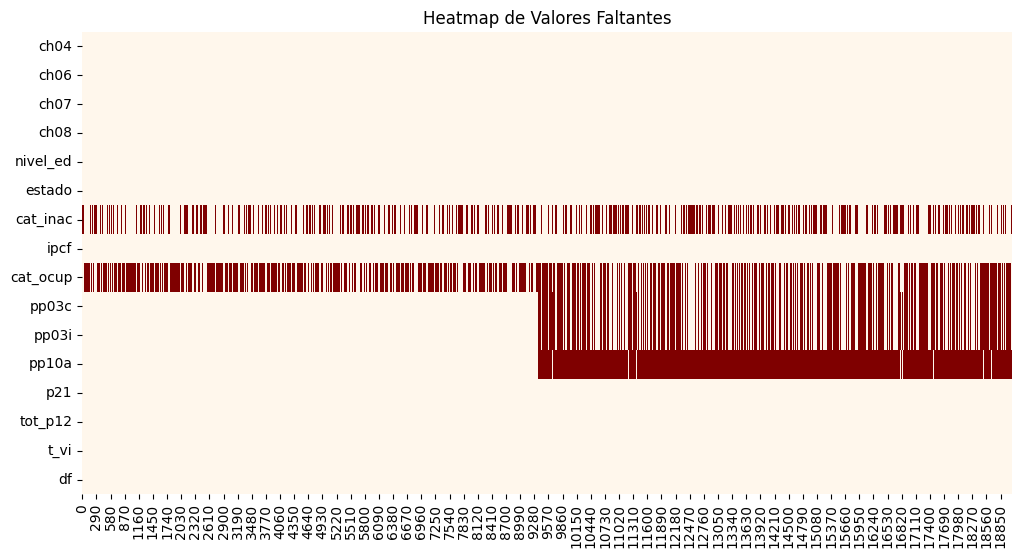

In [35]:
# Heatmap de valores faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(eph_105_125.drop(['CODUSU','nro_hogar'], axis=1).isna().transpose(), cbar=False, cmap='OrRd')
plt.title('Heatmap de Valores Faltantes')
plt.show()